# Daily Challenge: Data Transformation, Statistical Analysis, and Visualization
This notebook walks through the analysis of a synthetic dataset.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from numpy.fft import fft

# Seed for reproducibility
np.random.seed(0)

# Number of entries
n_entries = 1000

# Simulating dataset
time = np.linspace(0, 100, n_entries)
temperature = 20 + 5 * np.sin(np.pi * time / 50) + np.random.normal(0, 0.5, n_entries)
pressure = 1013 + 20 * np.cos(np.pi * time / 25) + np.random.normal(0, 1, n_entries)
chemical_concentration = 5 + 2 * np.sin(np.pi * time / 10) + np.random.normal(0, 0.2, n_entries)

# Creating DataFrame
ninja_data = pd.DataFrame({
    'Time': time,
    'Temperature': temperature,
    'Pressure': pressure,
    'Chemical Concentration': chemical_concentration
})

# Display the first few rows
ninja_data.head()

,Time,Temperature,Pressure,Chemical Concentration
0,0.0000,20.882026,1033.555963,4.693416
1,0.1001,20.231526,1033.890892,4.720490
2,0.2002,20.552262,1032.571356,5.134934
3,0.3003,21.214783,1033.090475,4.996730
4,0.4004,21.059555,1033.202742,5.234754


## Data Transformation

In [3]:
# Normalization: Transforming data to have mean 0 and standard deviation 1
normalized_data = ninja_data[['Temperature', 'Pressure', 'Chemical Concentration']]
normalized_data = (normalized_data - normalized_data.mean()) / normalized_data.std()
normalized_data['Time'] = ninja_data['Time']

# Logarithmic scaling (optional)
log_scaled_data = np.log(ninja_data[['Temperature', 'Pressure', 'Chemical Concentration']].clip(lower=1))

# Fourier Transformation
fft_temperature = fft(ninja_data['Temperature'])
fft_pressure = fft(ninja_data['Pressure'])
fft_chemical = fft(ninja_data['Chemical Concentration'])

# Display transformed data
normalized_data.head()

,Temperature,Pressure,Chemical Concentration,Time
0,0.253054,1.444895,-0.206291,0.0000
1,0.071093,1.468476,-0.187444,0.1001
2,0.160811,1.375573,0.101064,0.2002
3,0.346135,1.412122,0.004856,0.3003
4,0.302714,1.420026,0.170552,0.4004


## Statistical Analysis

In [4]:
# Descriptive statistics
ninja_data.describe()

,Time,Temperature,Pressure,Chemical Concentration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.000000,19.977372,1013.033617,4.989754
std,28.910854,3.574943,14.203350,1.436505
min,0.000000,13.897407,990.284418,2.559310
25%,25.000000,16.386984,998.852247,3.576024
50%,50.000000,20.008666,1012.950967,4.970976
75%,75.000000,23.570373,1027.062114,6.398067
max,100.000000,26.030294,1035.471676,7.486763


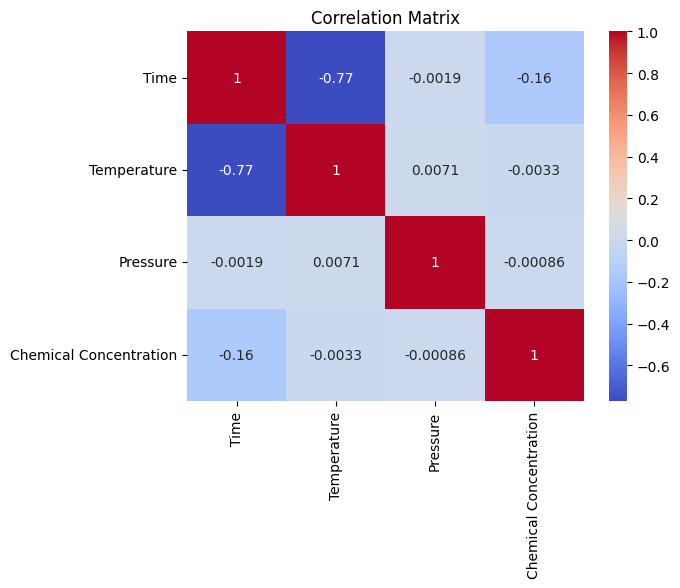

In [5]:
# Correlation matrix
correlation_matrix = ninja_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Data Visualization

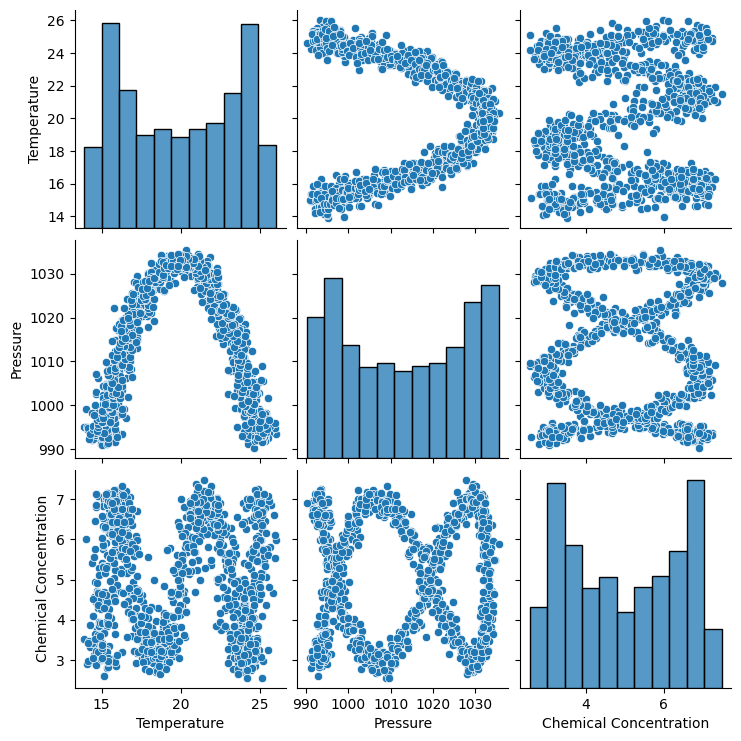

In [6]:
# Pairplot for scatter plots between variables
sns.pairplot(ninja_data[['Temperature', 'Pressure', 'Chemical Concentration']])
plt.show()

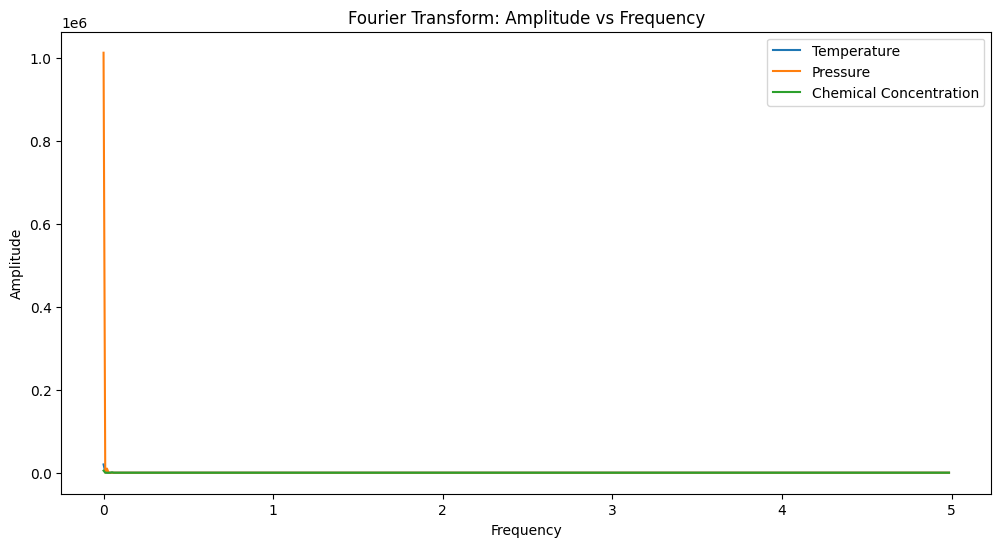

In [7]:
# Fourier Transform Visualization (Amplitude vs Frequency)
frequencies = np.fft.fftfreq(len(ninja_data['Time']), d=ninja_data['Time'].diff().mean())

plt.figure(figsize=(12, 6))
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_temperature)[:len(frequencies)//2], label='Temperature')
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_pressure)[:len(frequencies)//2], label='Pressure')
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_chemical)[:len(frequencies)//2], label='Chemical Concentration')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Fourier Transform: Amplitude vs Frequency')
plt.legend()
plt.show()

## Interpretation

1. **Normalization**: Helps to bring all variables to a common scale, aiding in comparisons.
2. **Fourier Transformation**: Identified dominant frequencies in the dataset, which could indicate periodic trends.
3. **Correlation Analysis**: Explored relationships between variables; stronger correlations may suggest underlying dependencies.
4. **Visualization**: Pairplots and heatmaps provided insights into distributions and inter-variable relationships.